In [1]:
#import the needed libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os


%matplotlib inline



## explore the different columns and cleaning the data

In [2]:
df = pd.read_csv("../input/ford-123/201902-fordgobike-tripdata (1).csv")

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.shape

(183412, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df.isnull().sum()


duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
df["start_time"]
df["end_time"]
# this needs to be adjusted to date time data type

0         2019-03-01 08:01:55.9750
1         2019-03-01 06:42:03.0560
2         2019-03-01 05:24:08.1460
3         2019-03-01 04:02:36.8420
4         2019-03-01 00:20:44.0740
                    ...           
183407    2019-02-01 00:12:50.0340
183408    2019-02-01 00:10:48.5020
183409    2019-02-01 00:08:27.2200
183410    2019-02-01 00:07:54.2870
183411    2019-02-01 00:04:52.0580
Name: end_time, Length: 183412, dtype: object


#### **preparing the data**

In [8]:
# change the start and end time into a datetime data type
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [10]:
df['user_type'].unique() #this should be a category

array(['Customer', 'Subscriber'], dtype=object)

In [11]:
df['member_gender'].unique() #also this should be category

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [12]:
df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

#### **try to extract the month and the day of the start date**

In [14]:
df['start_month'] = df.start_time.dt.strftime('%B')
df['start_day'] = df.start_time.dt.strftime('%A')
df['start_hour'] = df.start_time.dt.strftime('%H')



#### **change the duration into minutes to fit the start time format**

In [15]:
df['duration_min'] = df['duration_sec']/(60)

In [16]:
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_day,start_hour,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,February,Thursday,17,869.750000
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,February,Thursday,18,708.683333
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,February,Thursday,12,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,February,Thursday,17,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,February,Thursday,23,26.416667


**Try to extract the age of the clients using the member birth year**

In [17]:
df['member_age'] = (2019) - df['member_birth_year'] #giving the data was pupliched in 2019

**the main dataset consists of 183412 customer and has also 16 columns, gathering data about the location of the trip start and start date and the duration of the trip and also information about the clients like gender and age**

## **Data overview**

**for me analysis here i am interested only in some columns like the start time and duration to explore the trips times and also intersted in the info about the clients to see the relation between the different charchterisitics of the clients and their renting patterns**

## Univariate analysis

### **lets see which day of the week , we have the most clients**

Text(0.5, 1.0, "distribution of the platform's usage through the week")

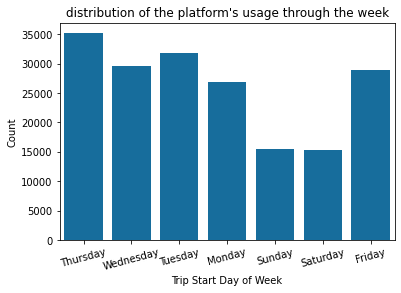

In [18]:
sb.countplot(data=df, x='start_day', color=sb.color_palette('colorblind')[0]);
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');
plt.xticks(rotation = 15)
plt.title("distribution of the platform's usage through the week")

In [19]:
#to get the days arranged and ordered we gonna do the following steps
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_category = pd.api.types.CategoricalDtype(ordered = True, categories = days)
df["start_day"] = df["start_day"].astype(days_category)

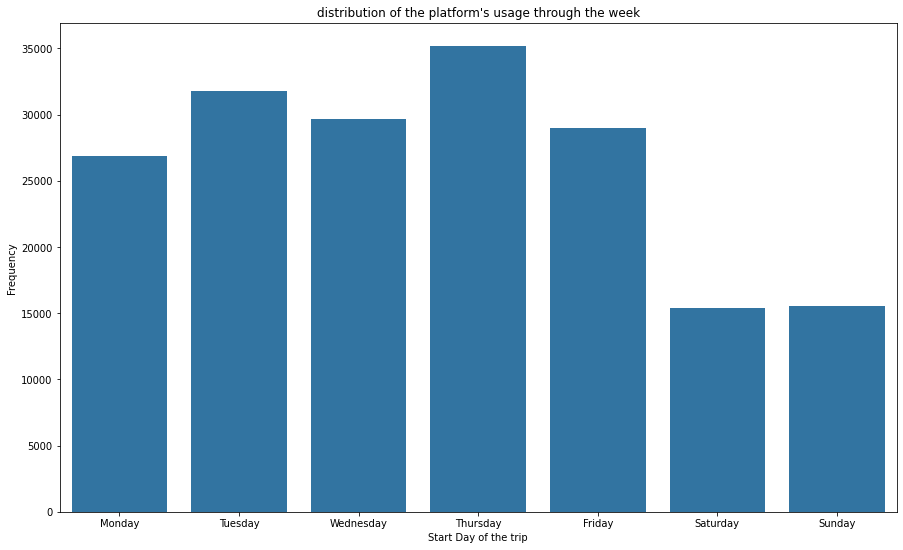

In [20]:
plt.rcParams['figure.figsize'] = 15, 9
sb.countplot(data=df, x='start_day', color=sb.color_palette()[0]);
plt.xlabel('Start Day of the trip');
plt.ylabel("Frequency");
plt.title("distribution of the platform's usage through the week");

**top 2 days are tuesday and thrusday**

### **lets explore the ruch hours in the day in which we got the most of our clients**

Text(0.5, 1.0, "distribution of the platform's usage through the day")

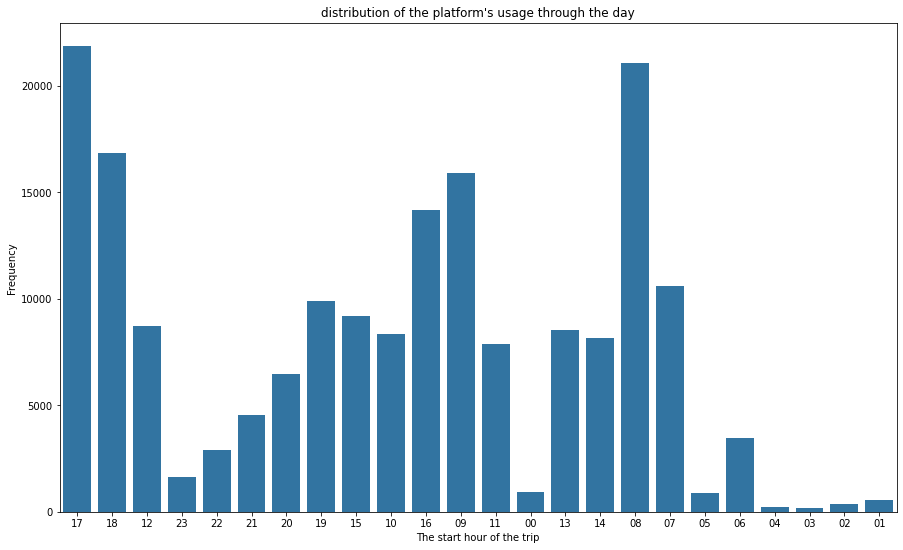

In [21]:
sb.countplot(data=df, x='start_hour', color=sb.color_palette()[0]);
plt.xlabel('The start hour of the trip');
plt.ylabel('Frequency');
plt.title("distribution of the platform's usage through the day")

**rush hours are between 16 and 18 and also from 7 to 9**

### **lets see the value of customers to the subscribers**

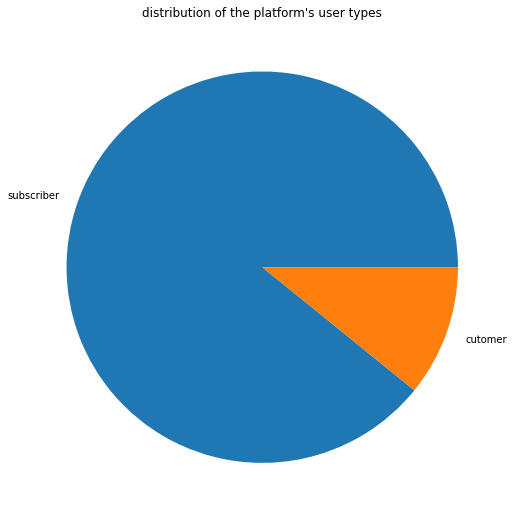

In [22]:
plt.pie(df["user_type"].value_counts(), labels = ["subscriber","cutomer"]);
plt.title("distribution of the platform's user types");

**most of the users are subscribers**

## **Multivariate Analysis**

**lets the relation between the gender and the duration of the trip**

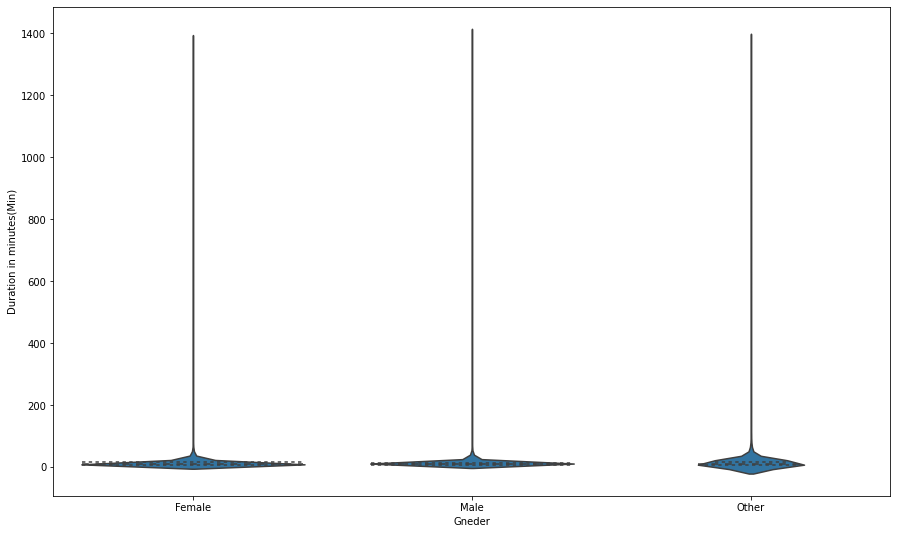

In [23]:
sb.violinplot(data=df, x='member_gender', y='duration_min', color=sb.color_palette()[0], inner='quartile');
plt.xlabel('Gneder');
plt.ylabel('Duration in minutes(Min)');

**we can see the effect of outliers in the duration vilon plot but the average of both male and female are nearly the same**

**lets the see the relation between the different user types and the duration of the trip**

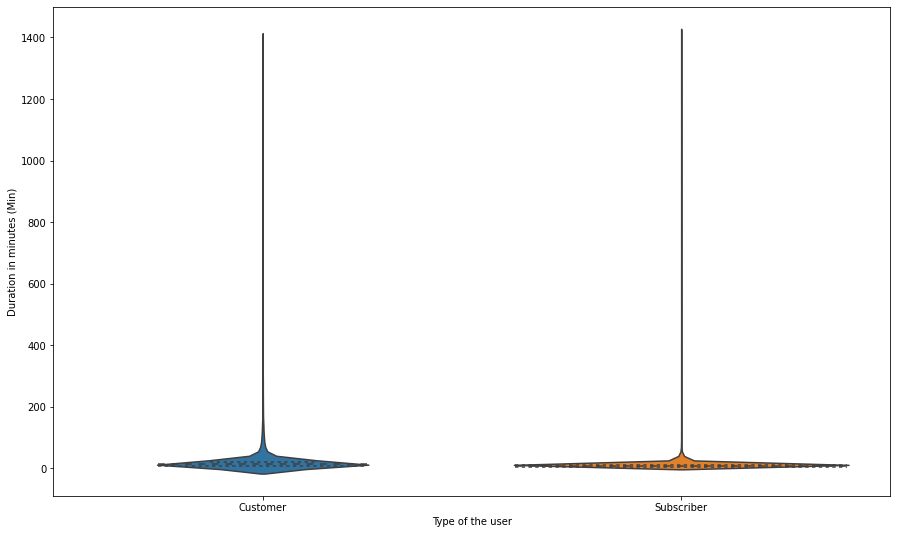

In [24]:
sb.violinplot(data=df, x='user_type', y='duration_min', inner='quartile');
plt.xlabel('Type of the user');
plt.ylabel('Duration in minutes (Min)');

**we can conclude that the duration has a lot of outliers which affects our analysis, so we need to remove these outliers to get proper plots**

### **removing outliers from the duration column**

In [25]:
df['duration_min'].describe(percentiles=[0.025, .975])

count    183412.000000
mean         12.101307
std          29.906496
min           1.016667
2.5%          2.233333
50%           8.566667
97.5%        35.728750
max        1424.066667
Name: duration_min, dtype: float64

Text(0.5, 1.0, 'Histogram of the duration in minutes')

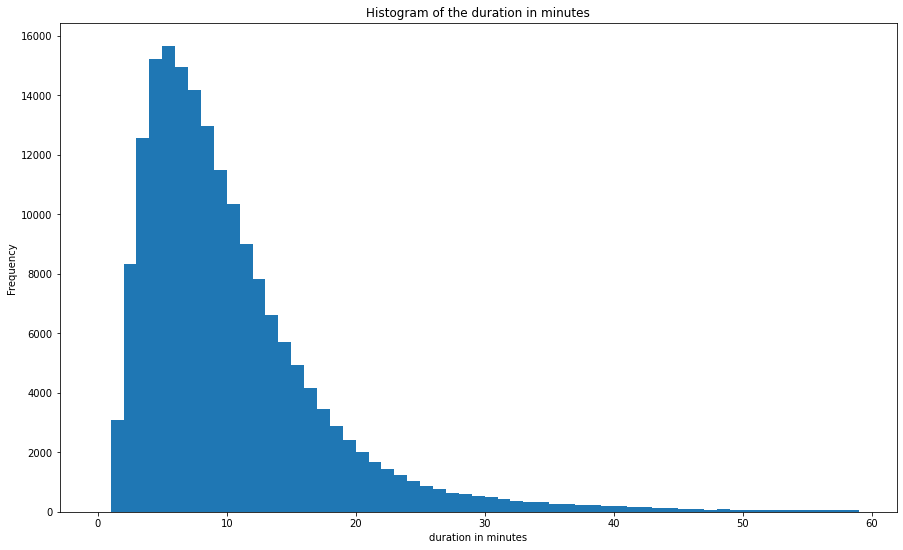

In [26]:
plt.hist(df['duration_min'],bins = np.arange(0, 60, 1));
plt.xlabel("duration in minutes")
plt.ylabel ("Frequency")
plt.title("Histogram of the duration in minutes")

**we can conclude that we can safely remove any trip whcih is longer than 50 min**

In [27]:
df = df[df["duration_min"] <= 50]

**Let's see now the same previous plots after removing the outliers**

Text(0.5, 1.0, 'relation between gender and duration of the trip')

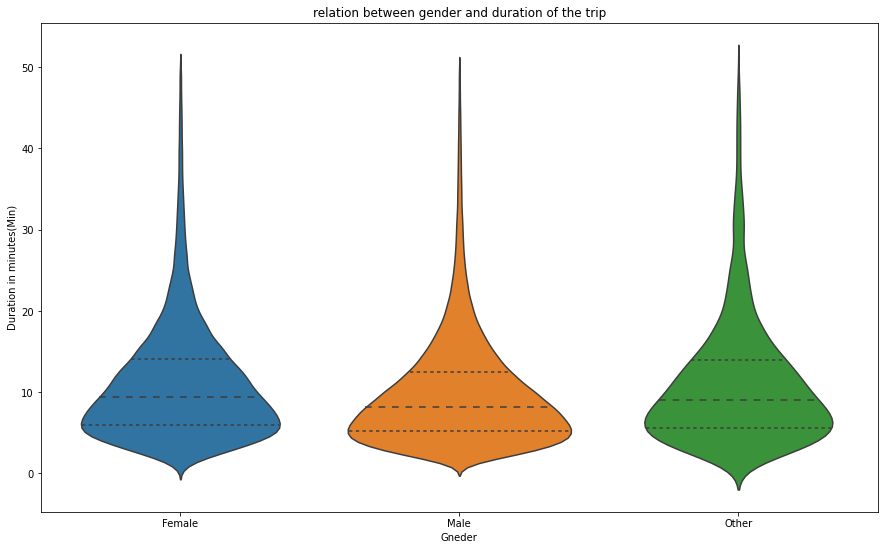

In [28]:
sb.violinplot(data=df, x='member_gender', y='duration_min', inner='quartile');
plt.xlabel('Gneder');
plt.ylabel('Duration in minutes(Min)');
plt.title("relation between gender and duration of the trip")

**we can conclude the gender is not affecting the duartion of the trip significantly**

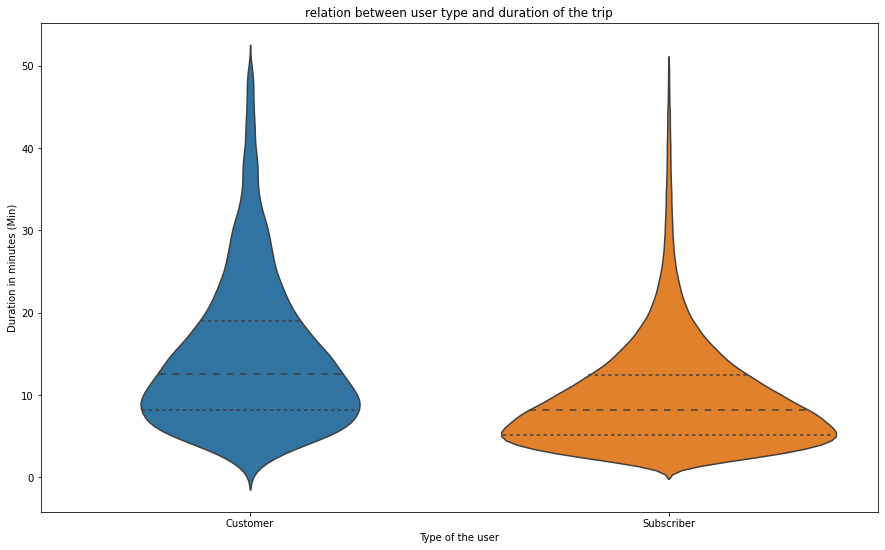

In [29]:
sb.violinplot(data=df, x='user_type', y='duration_min', inner='quartile');
plt.xlabel('Type of the user');
plt.ylabel('Duration in minutes (Min)');
plt.title("relation between user type and duration of the trip");


**we can see that the average duration of customers are longer than subscribers**

## **Multivariate Analysis**

**lets see the relationship between the day and the hour and the user type as a heatmap**

In [30]:
customers = df.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_day', 'start_hour']).size()
subscribers = df.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_day', 'start_hour']).size()



In [31]:
ct_counts = ct_counts.reset_index(name='count')
st_counts = st_counts.reset_index(name='count')

In [32]:
ct_counts = ct_counts.pivot(index='start_day', columns='start_hour', values='count')
st_counts = st_counts.pivot(index='start_day', columns='start_hour', values='count')

In [33]:
ct_counts

start_hour,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
start_day,,,,,,,,,,,,,,,,,,,,,
Monday,10,1,1,0,4,6,42,128,253,194,...,142,164,241,338,188,112,73,55,33,11
Tuesday,4,3,4,0,2,9,36,133,346,212,...,119,137,194,356,255,140,64,46,36,14
Wednesday,11,2,1,1,1,7,34,102,286,169,...,104,129,189,364,247,125,95,58,41,29
Thursday,16,4,3,1,2,20,41,164,338,264,...,133,161,268,502,387,196,111,69,53,34
Friday,15,5,9,2,2,14,35,163,386,292,...,133,183,241,319,175,90,63,64,56,36
Saturday,28,19,9,4,5,11,3,18,59,106,...,299,235,219,169,99,76,47,41,29,36
Sunday,17,19,23,4,4,4,2,18,42,78,...,296,279,280,196,127,84,75,48,32,24


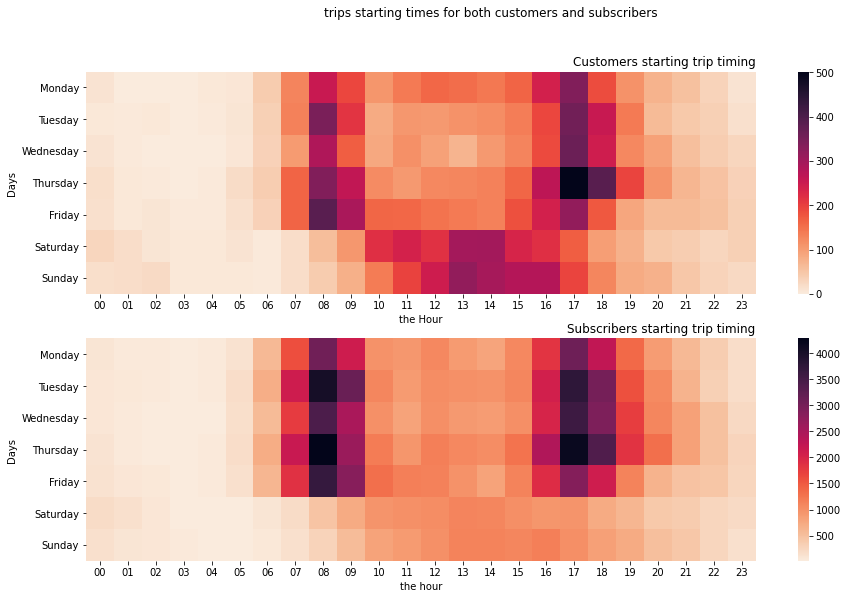

In [34]:
plt.suptitle('trips starting times for both customers and subscribers')

plt.subplot(2, 1, 1)

sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customers starting trip timing', loc='right');
plt.xlabel('the Hour');
plt.ylabel('Days');

plt.subplot(2, 1, 2)
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscribers starting trip timing', loc='right');
plt.xlabel('the hour');
plt.ylabel('Days');


**we can conclude that the usage patterns of customers differ from that of subscribers, the customers are active the most on the platform from 7 to 9 and from 16 to 19 in week days while in week ends they are active the most from 10 to 17.**

**while subscribers are active the most from 6 to 9 and from 16 to 19 in weekdays.
we can conclude that most of the subscribers use the platform to go to and back from work**

## Conclusions

In [35]:
### subscribers uses the platform to go and back from work in rush hours while customers use the platform form liesure usage.
### most of the platfrom's users are subscribers.
### the average trip duration for customers are longer because they are exploring and and enjoying the ride.